# 4장

# 선형 회귀

In [3]:
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

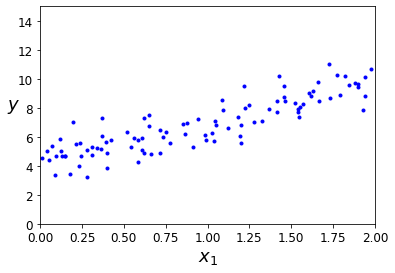

In [5]:
# 무작위로 생성한 선형 데이터셋
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [6]:
# 비용함수를 최소화하는 세타 값을 찾기 위한 해석적인 방법
# -> 수학 공식 = 정규방정식
# 정규방정식을 사용해 계산
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best
# 결과 = 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현 못함.

array([[4.21509616],
       [2.77011339]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

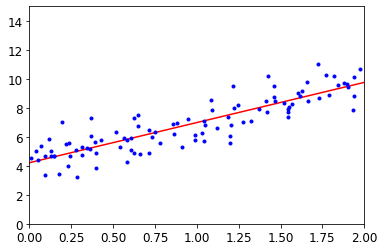

In [10]:
# 모델의 예측을 나타낸 그래프
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
# 사이킷런에서 선형 회귀 수행
# LinearRegression = scipy.linalg.lstsq() 함수를 기반으로 함.
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [ ]:
# np.linalg.pinv() 함수를 사용해 유사역행렬을 구함.
np.linalg.pinv(X_b).dot(y)

# 경사 하강법

경사하강법(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘

경사 하강법에서 중요한 파라미터는 스텝의 크기로 학습률 하이퍼파라미터로 결정.

In [14]:
# 배치 경사 하강법 구현
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
# 결과 확인
theta
# 결과 = 정규방정식으로 찾은 것과 같다.

array([[4.21509616],
       [2.77011339]])

배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련세트를 사용해 그레이디언트를 계산한다는 사실이다.
훈련 세트가 커지면 매우 느려진다.

확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다. 매 스텝에서 다뤄야 할 데이터가 매우 적어 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 빨라진다.

In [19]:
# 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients 

In [20]:
theta

array([[4.20787268],
       [2.81981249]])

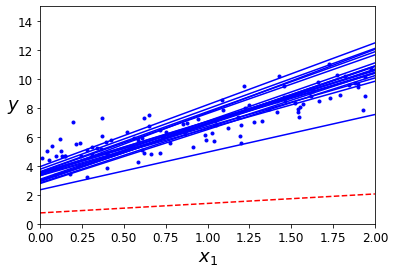

In [22]:
# 확률적 경사 하강법의 첫 20개 스텝 그래프
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음

plt.show()   

In [23]:
# 사이킷런에서 SGD 방식으로 선형 회귀 사용
# => SGDRegressor 클래스 사용
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# 다항 회귀

비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다. 

각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터 셋에 선형 모델을 훈련시킨다.
=> 다항 회귀

In [26]:
# 2차방정식으로 비선형 데이터를 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [27]:
# 사이킷런 PolynomialFeatures을 사용해 훈련 데이터 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.7735161])

In [29]:
# X_poly은 이제 원래 특성 X와 이 특성의 제곱을 포함
X_poly[0]

array([-2.7735161 ,  7.69239155])

In [30]:
# 훈련 데이터에 LinearRegression을 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04956518]), array([[0.8608643 , 0.44442632]]))